In [144]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
f = pd.read_csv("./gooddata.csv", sep = " ", header=None, index_col=0)

In [42]:
dat = {}
for i in range(1, len(f.index)):
    year = f.index[i]
    line = f.ix[i]
    datmom = [] 
    for j in range(1, len(line),2):
        if j-1 !=0:
            a = [(str(line[j]).lower()),line[j-1]]
            datmom.append(a)
            
    dat[year] = datmom

In [98]:
all = {}
for year in dat:
    valz = []
    dft = pd.DataFrame(dat[year])
    agg = dft.groupby(0).sum()
    agg.sort(columns=1, inplace=True,ascending=False)
    for i in agg.iterrows():
        valz.append([str(i[0]), int(i[1])])
    all[year] = valz

In [101]:
f = open('penis','w')
for ym in all:
    line = []
    line.append(ym)
    for word in  all[ym]:
        line.append(word[0])
        line.append(str(word[1]))
    l = " ".join(line)
    f.write(l+"\n")    

In [54]:
dft = pd.DataFrame(dat['1953-06'])

In [87]:
agg = dft.groupby(0).sum()
agg.sort(columns=1, inplace=True,ascending=False)

In [148]:
def get_word(counts, word):
    global ax 
    res = {}
    for y in counts:
        dt = counts[y]
        for item in dt:
            if item[0] == word:
                res[int(y[:4])] = int(item[1])
    df = pd.DataFrame.from_dict(res, orient="index")
    df.sort().plot()
    return df

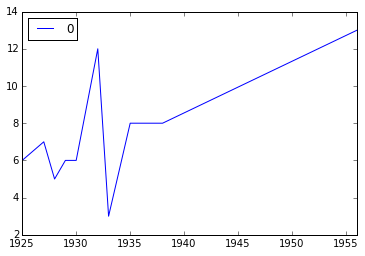

In [174]:
ballet = get_word(all, "ballet")

In [175]:
genres = ["ballet", "blues", "dansemusik", "jazz", "klassisk", "klokkespil", "pop" , "polka"]

# write data for processing 

In [177]:
f = open('finalwords.csv','w')
for ym in all:
    line = []
    line.append(ym)
    for g in genres:
        line.append(g)
        line.append(str(0))
    for word in  all[ym]:
        if word[0] in genres:
            line[line.index(word[0])+1] = str(word[1])      
    l = ",".join(line)
    f.write(l+"\n")    